## PSIREN ($\Psi$-ren) Plastic Spiralling in River Networks

## Governing equations

The following presents a reduced complexity formulation of microplastic particle movement cast within a spiraling framework, where downstream transport is governed by time-varying spiralling metrics. 

We consider groups of homogenous particles in our equations called _cohorts_ and neglect interactions between cohorts, as well as specific processes such as biofilm formation aside from how biofilms control empirical estimates used to inform our parameters.  Furthermore, we do not consider the breakdown of particles to smaller sizes, nor the aggredation of multiple particles to larger sizes, which is a simplification that may be inappropriate (Besseling et al. 2017), but makes a network scale study tractable.

For each cohort, we conserve the number of microplastic particle particles within the water column of the stream and deposited on the reach's bed.  Particles in suspension in the water column are tracked by volumetric count density $n_c$ ($count\ L^{-1}$) and depositedd particles are tracked by area count density $N_b$ ($count\ m^{-2}$).  Our calculation requires input estimates of stream width, depth, and velocity (making discharge), and hydraulic geometry parameters.  These estimates could come from a variety of sources, but we use estimates from the distributed hydrologic model WBM (Grogan et al. 2022, 10.5194/gmd-15-7287-2022).

[comment]: # (I think that we may have ability to consider subpixel variability in these parameters in a stochastic way)


The count balance and mass balance are related by particle attributes principal diameter ($r,\ mm$), axial radius ratio ($\chi,\ -$), and particle density ($\rho_p ,\ kg\  m^{-3}$).


To describe microplastic fluxes, we couple two governing equations describing the count of particles in the cohort residing in suspension within streamflow, and the count of particles settled on the stream bed.  The equations governing the count balance within a given control volume are given by:


$$ V \frac{\mathrm{d} n_c } {\mathrm{d} t} = \dot{n}_{up} + \dot{n}_{nonp} + \dot{n}_{point} + \dot{n}_{resus} - U_c A_b \label{eq1}$$
$$ A_b \frac{\mathrm{d} N_b }{\mathrm{d} t} = U_c A_b - \dot{n}_{resus} - \dot{n}_{burial}  \label{eq2} $$

where $V$ is the volume of water in the reach ($m^{3}$),$n_c$ is the count concentration in the water column ($count\ m^{-3}$), $\dot{n}_{up}$, $\dot{n}_{nonp}$, $\dot{n}_{point}$, $\dot{n}_{resus}$, and $\dot{n}_{burial}$ are count fluxes of particles from upstream, lateral/terrestrial non-point inputs, point source inputs, from or to resuspension, and to burial ($count\ d^{-1}$), respectively, $U_c$ is the areal settling rate ($count\ m^{-2} d^{-1}$), $A_b$ is the reach's bed area ($m^{-2}$), and $N_b$ is the particle count area density ($count \ m^{-2}$).

## Settling 

The settling flux depends on water column concentration and is therefore considered a first-order process at the pseudo-steady state during each time-step:
$$U_c = v_{eff} n_c $$
where $v_{eff}$ is an effective settling velocity ($m\  d^{-1}$), which is related to the settling velocity of Stoke's Law ($v_{set}$):
$$ v_{set} = \frac{2r^2 (\rho_p -\rho_w)g}{9\mu}$$
where $r$ and $\rho_p$ are the cohort's particle effective radius and density, $\rho_w$ is water density, $g$ is gravitational acceleration, and $\mu$ is the dynamic viscosity of water.  

[comment]: # (units intentially left off because it will get tricky going from micro-meters to meters)

Hoellein et al. (2019, 10.1038/s41598-019-40126-3) find a log-linear relationship between particle size and the ratio of observed depositional velocity and settling velocity:

$$v_{eff} = 200.0\ v_{set} \ (2r)^{a} $$
where $a$ is a empirical parameter describing the log slope between effective and settling ratios and particle radius in $\mu m$ equal to approximately -1.2. 

By dividing through the constant volume ($V$) of the reach at each pseudo-steady state timestep, multiplying by $A_b$, we get an expression for the settling flux as:

$$ \dot{n}_{sett} = \frac{v_{eff}}{h} n_c $$
where $h$ is the average depth of flow in the reach or $\frac{V}{A_b}$.

## Inputs to the reach

A common assumption used in WBM (Grogan et al. 2022) is to force all inputs to the top of the reach at each new time-step.  Inputs will include upstream flow, local inputs from point and non-point sources, mass stored in water from the previous time-step, and resuspension from the bed.  In most circumstances, inputs will be dominated by upstream flow, so the assumption is supported.  As the pixel size decreases, the error associated with this assumption is reduced.  While the approach outlined here may yield biases in estimation of specific fluxes, the benefit is that mass (or particle counts) are perfectly preserved without the introduction of numerical instabilities or errors. 

Because we will solve for concentration changes as a function of distance (assuming plug flow in streams), we treat the mass of particles contained within the volume of water representing the reach volume as an instantaneous input to the reach as well $n_c^{(k-1)}$ (where $k$ is the present timestep), which has a representative flow equal to the reaches volume divided by the timestep length $V dt^{-1}$.  

Particle flux $\dot{n}_{input}$ into the reach control volume at timestep $k$ is calculated:

$$ \dot{n}_{input} = \dot{n}_{nonp} + \dot{n}_{point} + \dot{n}_{fromStore} + \dot{n}_{resus} + \dot{n}_{up} $$
where $\dot{n}_{nonp}$ and $\dot{n}_{point}$ are non-point and point sources to the reach, $\dot{n}_{fromStore}$ is the mass entering the represented volume from storage at the beginning of the timestep (distributed across the time-step duration), $\dot{n}_{resus}$ is the flux entering the water column from resuspension (described) below, and $\dot{n}_{up}$ is the flux from upstream.  A representative input concentration $n_0$ is calculated from these fluxes and a total flow traversing the reach $Q_{tot}$ including upstream flow $Q_{up}$, and local runoff $Q_{ro}$.

$$ Q_{tot} = Q_{up} + Q_{ro} $$

$$ n_0 = \frac{\dot{n}_{input}}{Q_{tot}} $$

Loading functions are described in more detail below.

## Solving for water column plastics

Now assuming that volume remains constant within the reach at each timestep, all inputs to the reach are well-mixed at time-scales smaller than the timestep, and that average fluid velocity in the reach is such that a) residence time within pixel is much smaller the timestep and b) that longitudinal dispersion can be neglected, we treat concentration changes as a plug flow.  

In plug-flow concentrations are unchanged by interactions with other parcels of water (e.g. mixing) and are subjected only to settling effects, as a first order process.  The first order change in concentration due to settling is given by:

$$\frac{\mathrm{d} n_c } {\mathrm{d} t} = U \frac{\mathrm{d} n_c } {\mathrm{d} x} = - \frac{v_{eff}}{h} n_c  $$
as is shown above, and where $U$ is the mean flow velocity ($m\  d^{-1}$).

To solve for a new concentration, $n_c$ we integrate over the distance yielding:
$$ n_c = n_0 \exp(-\frac{v_{eff}}{hU} x ) $$ 
where $n_0$ is the input concentration which we estimate as a mixture of all sources for each timestep, and $x$ is a distance where we evaluate the new concentration, specifically the end of the reach where $x = L$.  But, because we assume no volume changes during the time-step, the settling flux can be calculated as the complement to the change in concentration, or:
$$\dot{n}_{sett} = \dot{n}_{input} \left(1 - exp(-\frac{v_{eff}}{hU}L)\right) $$
Where stream velocities are so so low and reach lengths long such that $\frac{L}{U} > \mathrm{d}t$, the timestep length $\mathrm{d}t$ will be substituted.  Subsequently, concentration can be updated as:
$$ n_c = \frac{\dot{n}_{input} - \dot{n}_{sett}}{ Q_{tot}} $$

Using WBM's routing scheme, this concentration will be associated with both downstream flow $Q_{down}$ and storage within the pixel volume.  Therefore the flux downstream $\dot{n}_{down}$ is calculated as:
$$\dot{n}_{down} = n_c Q_{down}$$

Which will be input as $\dot{n}_{up}$ in the next downstream reach.

## Coupling bed and water column particle balance

The particle balance in the water column and on the bed are coupled through the settling flux and resuspension fluxes.  Recall that we assume resuspension flux as an input to the control volume of the water column at the start of each timestep.  This implies that resuspension occurs instantaneously at the start of a timestep when forced with new conditions (specifically flow velocity).  Therefore, for tractability, resuspension neglects any mass that would have potentially settled and be resuspended during the timestep.  Because we assume all inputs to the top of the reach, resuspended mass has the potential resettle on the same reach.  We consider this to reflect a potential bias in our solution that would promote retainment within a reach on the stream bed.  This structural bias could be easily overcome by parameters that promote resuspension or limit settling, and should be considered if parameter estimates generated here are used in other physical solutions.  Or our framework could be revisited (likely by at least introducing a mid-point solution), but potentially higher-order numerics.

Resuspension is a function of the shear stress imposed on the bed by flow ($\tau$).  When $\tau$ exceeds a critical sheer stress ($\tau_{crit}$), mass will be resuspended into the water column. $\tau$ is calculated as:

$$\tau = \rho_w \left( \frac{\sqrt{g} U}{c} \right)^2 $$
where $c$ is the Chezy coefficient ($m^{0.5}\ s^{-1}$), which is a tabulated parameter that describes the roughness and shape of the channel by: 

$$ c = \frac{1}{n_M R/6} $$

where $R$ is the hydraulic radius of the channel, and $n_M$ is the Manning's roughness. $\tau$ is compared to the critical shear stress $\tau_{crit}$:

$$\tau_{crit} = \tau_{ci} g(\rho_p - \rho_w) d $$
where $\tau_{ci}$ is the dimensionsless Shield's cricitcal shear stress, generally accepted to be 0.06, but can range from 0.02 to 0.25 depending on the size distribution of bed particles (Andrews 1983).

[comment]: #(Entrainment of Gravel From Naturally Sorted Riverbed Material. Geological Society of America Bulletin, v.94, p. 1225-1231, October 1983).) 

The resuspension flux is calculated as:

$$
\dot{n}_{resus} = A_b \left\{
    \begin{array}\\
        k_{resus} \left(\frac{\tau}{\tau_{crit}} - 1\right)N_b & \mbox{if } \ \tau \gt \tau_{crit} \\
        0 & \mbox{if } \ \tau \leq \tau_{crit} \\
    \end{array}
\right.
$$

where $k_{resus}$ is the maximum resuspension rate constant ($d^{-1}$).

In practice, the resuspension flux is calculated at the beginning of the timestep with $N_b$ representing bed area particle density from the previous timestep, and updated values for stream velocity and bed area (as width of flow in the channel expands).  

[comment]: #( How are we going to do this?  I can't subdivide the reach to multiple compartments along the width, but some of the width will exchange and some won't.  I think this is potentially one of the more clever ways I can represent hystersis - Can I use a distribution of storage along the channels half-width?  Then calculate changes over a few moments of that distribution?)


## Solving for bed concentration

The resuspension flux is input to the solution of the water column concentration and settling, and the settling flux is solved.  Therefore, both settling and resuspension fluxes are input to the equation updating the balance of particles on the bed:

$$ \frac{\mathrm{d} N_b }{\mathrm{d} t} = \dot{n}_{sett} A_b^{-1} - \dot{n}_{resus} A_b^{-1} - \dot{n}_{burial}  A_b^{-1}$$

The burial flux is assumed to follow a simple first-order process (linearly related to concentration in storage on the bed).  

$$\dot{n}_{burial} = k_{burial} N_b A_b $$
where the burial transfer constant ($k_{burial}$, $d^{-1}$) is a calibration parameter.

To solve the balance of particles on the bed, we consider a control volume on the surface that at each time-step has an initial particle count density ($N_b^*$) calculated as the sum of prior count density ($N_b^{(k-1)}$) plus the total of settling less resuspension occuring over the timestep:

$$N_b^* = N_b^{(k-1)} + \dot{n}_{sett} A_b^{-1} {\mathrm{d} t} - \dot{n}_{resus} A_b^{-1}{\mathrm{d} t} $$

Burial is calculated as a first order process in a simple well-mixed reactor.  This implies that we are assuming the bed pool is an infinitesmally thin surface, and all fluxes are equally likely to occur anywhere along the wetted stream-width.  Under this assumption - burial is a permanent removal from the system.  These assumptions oversimplify real responses of armoring of sediments, compaction and deposition on top, but generally capture the observation of removal of particles from hydrologic flow.  The assumptions here are considered reasonable to capture stream response under typical flows and modest storms, however, should be treated with skepticism under significantly higher, geomorphologically relevant flows producing significant scour and redposition of bed/bank sediments.

With the above assumptions, the number of particles buried $N_{burial}$ is calculated as:

$$ N_{burial} = N_b^* \left( 1 - exp( - k_{burial} \mathrm{d}t) \right) $$

and bed storage is updated as:

$$ N_b = N_b^* - N_{burial} $$

## Model simplifications

Bed interactions in the model will likely evolve.  The three parameters for microplastic particles are virtually undefined ($k_{burial}$, $\tau_{ci}$, and $k_{resus}$) such that more literature review and uncertainty analysis will be needed.  

If we assume that typical hydrologic flows represented by the model are geomorphologically active, then flow can access all bed materials and $k_{burial}$ should be close to 0.  There is much more research needed for the resuspension constant, and Besseling et al. (2017) cite a master's thesis for values ranging from 100 to 300 $g\ m^2\ d^{-1}$, which need to be converted to particle counts.  (How many sediment particles are in 100 to 300 grams, and how does this get us to a particle flux concentration, unless $N_b$ is supposed to be a number fraction?)

Given the on-going questions with how to define variables such as the maximum resuspension rate constant, we propose the following simplifications:

1) $k_{burial} \approx 0.0$  (all mass remains in the active bed pool)

2) $\tau_{ci} = 0.06$  (resuspension of particles follows Shield's simplifications)

3) $k_{resus} = 0.999$ (at $\tau$ equal to $2\tau_{crit}$ all mass will be resuspended. Upper limit imposed in code.  This will be revisited first.)

## Plastic loading to reaches

As noted above the flux of particles entering a reach is assumed to enter the water column from local non-point and point sources ($\dot{n}_{nonp}$ and $\dot{n}_{point}$, respectively).  Presently, we know of one study that identified 0.25 particles per liter of Waste Water Treatment Plant effluent, or releasing 6.5e$^7$ particles per day for a secondary treatment facility servicing a population of 650,000 people (Murphy et al. 2016).  While it is certain that such facilities are an important source of microplastics to rivers, we find that we have insufficient data to properly parameterize direct point-source loading models.  Instead, we will opt for a generalizeable approach that builds off of national scales estimates, and assume that these strategies are applicable at finer spatial resolutions.


As reported by Schmidt, Canada and the USA have rates of mismanaged plastic waste ($MMPW$) of 1.8  and 6.7 g / person / day or 4.9 and 18.3 kg / person / y.  Schmidt et al. (2017) also found strong correlation between the Load of MMPW ($L_{MMPW} \ kg\ y^{-1}$) and annual load to streams.  They find that the mass load of microplastics ($ y_M \ kg\ y^{-1}$) observed in rivers was described by the equation:

$$ y_M = 1e^{-4} {L_{MMPW}} ^{1.74} $$

We use population density ($D_p \ person\ km^{-2}$) to estimate MMPW from country averages for individual pixels, and then calculate the load for each pixel ($L_M \ kg\ y^{-1}$) based on pixel area ($A \ km^2$):  

$$ L_M = 1.e^{-4} \left(  MMPW \ D_p \ A \right)^{1.74} $$

Then we disaggregate this load to number of particles across a collection of particle cohorts according to an assumed fractal size disaggregation.  (Insert discussion of the fraction of densities based on typical distributions of materials types.  Starting with heavy particles - e.g. polyethylene terephthalate or PET density of 1.4 g/cm$^3$). Schmidt report that while mass of both micro and macro plastics are equal, however, the number of particles increases by approximately 100.   Extrapolating down from there, we expect fractal behavior of particle sizes, namely as we reduce the size of particles, the mass represented will remain approximately equal requiring geometrically more particles represented.  The total mass loading ($L_M$) will be disaggregated according to a truncated power-law (Haggerty et al. 2000) with a slope parameter $k$ where $k>0$ and $k\ne 2$ such that the proportion ($b$) of individual masses of particles ($m_i$) contributing to total load is given by:

$$ b(m_i) = \frac{L_m(k-2)}{{m_{max}}^{k-2} - {m_{min}}^{k-2}} m_i^{k-3} $$

where $m_i$ is the mass of particles representing cohort $i$, $m_{max}$ and $m_{min}$ are the maximum and minimum masses of particles represented by all cohorts. Considering the density of a collection of cohorts, these can be calculated from the operational definitions used to describe microplastics (maximum particle size equals 5 mm and minimum particle size equal 0.1 mm - however, we could feasibly extrapolate to smaller particles).  Once the distribution of individual particle masses are generated, the load is disaggregated by size class, and the counts represented by each class are calculated.

Note: As this evolves we will want to split the fraction of mass loading by plastic type and shape.  For now, I am assuming plastic particles are derived from drinking bottles, so are spherical below 0.3 mm, and sheets (with 0.3 mm thickness). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Define cohort distribution

In [2]:
n = 10   #  Depending on interactions with flow - maybe disaggregation here will be important.
k = 2.2  # Values greater than 2 assume that larger particles comprise a larger share of the total load than smaller.
L_m = 0.0278 # kg / y  #  This is a value that will depend on pixel size, population, and whatever else we come up with.
# Given minimum mass, maximum mass, number of cohorts for this density class, and shape parameter (not 2)
def pl_dist(mmin,mmax,n,k):
    ## Uses a generalizable harmonic mean estimate of power-law distributions from Haggerty et al. (2000)
    assert k != 2, "try a shape value other than 2, or include ln solution ..."
    A=np.logspace(np.log10(mmin),np.log10(mmax),n)
    b=(A[1:]**(k-2.)-A[:-1]**(k-2.))/(A[-1]**(k-2.)-A[0]**(k-2.) )
    A=( (k-3) / (k-2) ) * (A[:-1] *((A[1:]/A[:-1])**(k-2) - 1 ) / ( (A[1:]/A[:-1])**(k-3) - 1) )
    return A,b

def get_ms(density=1.4,max_diam=5.0, min_diam=0.1):
    # Given a density of plastic (defaults to 1.4 g / cm^3 for PET - commonly used in plastic bottles),
    #  and maximum and minimum diameters of particles,
    #  and a given shape --- !!! assuming sheets of plastic that have an orthogonal thickness of 0.3 mm when max diam is > 0.3 !!!
    #    otherwise a sphere
    maxmin=[max_diam,min_diam]
    ms=[]
    for diam in maxmin:
        if diam > 0.3:
            # Assuming the max particle is likely a square sheet with a diagnol of max_diam, and a thickness of 0.3 mm
            V = 0.001 * 0.3 * (0.5*diam**2) # mm3 -> cm3
            ms.append( 0.001 * V * density)  # g -> kg
        else:
            # Assuming the particle is a sphere
            V=0.001 * 4/3.*np.pi * (diam/2)**3
            ms.append( 0.001 * V * density )
    return ms

max_m, min_m = get_ms() # Get masses of minimimum and maximum particle sizes 
ms,b = pl_dist(min_m,max_m,n,k)  # Draw the distribution of these particle sizes for a population of size n
ns = L_m*b/ms   # Get the number of particles represented by a given load and size distribution.

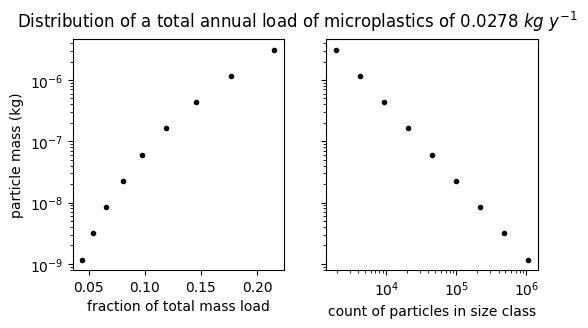

In [3]:
fig,(axa,axb)=plt.subplots(1,2,figsize=(6,3),sharey='row')
axa.semilogy(b,ms,'k.')
axa.set_ylabel("particle mass (kg)")
axa.set_xlabel("fraction of total mass load")
axb.loglog(ns,ms,'k.')
axb.set_xlabel("count of particles in size class")
t=fig.suptitle("Distribution of a total annual load of microplastics of {} $kg \ y^{{-1}}$".format(L_m),fontsize=12)

The above formulation defines the properites and amount of particles entering a given reach at annual timescales.  We are interested in understanding the dynamics that occur at storm time-scales.  

___EQUIFINALITY WARNING___
Are first flush, or other hysteretic effects we may or may not be able to represent with the model a reflection of re-mobilization from the stream-bed?  Or loading?  Or transport from upstream?  These questions are going to be very hard to answer - both empirically from the storm data we're collecting - or with the model.  Some pretty clever sensitivity analyses with the model may help, but I doubt we scoped adequate corroborating data for any rigorous hypothesis testing.

## Landscape dynamic storage

To distribute the loading of particles throughout the year, we make similar assumptions as Meijer et al. (2021) and assume that runoff drives the mobilization of plastic waste and particles into rivers.  To add temporal dynamics we introduce a pool representing the land-scape surface where plastic can be mobilized to streams.  (We assume that plastic accumulating on portions of the landscape that won't be mobilized to the stream are captured by the small fractions of total mismanaged waste predicted by the specific loading functions of Schmidt.)  

The total mass load calculated for each pixel is introduced to this pool at a constant rate per day.  Mobilization from this pool is non-linearly related to runoff.  The balance of this pool $M_{land}\ kg$ is calculated as:

$$ \frac{\mathrm{d}\ M_{land}}{\mathrm{d} t } = L_m - M_{land}\dfrac{Q_{ro}}{\overline{Q_{ro}}}^{\Psi_{land}} $$

where $\overline{Q_{ro}}$ is mean annual runoff for the pixel (calculated from WBM output), and $\Psi_{land}$ is a shape parameter controlling the propensity for mobilization, where higher values will mobilize dynamic storage more readily.  

Several dynamics are captured by this simple model of landscape mobilization. First, we make an _a priori_ assumption that waste is mis-managed consistently throughout the year (no seasonal signal).  The model would predict that for long-periods without significant runoff, $M_{land}$ will be high potentially creating pulse events of high loading.  In our study regions, we expect these pulses to occur in the spring and fall.  The corollary is that following instance runoff events, the pool is exhausted and mobilizes less mass.  In applying the above model, the solution is explicit ($M_{land}$ from the previous time-step is used to estimate mobilized mass), and the term $\dfrac{Q_{ro}}{\overline{Q}_{ro}}^{\Psi_{land}}$ is bounded between 0 and 1.  We neglect the role of wind in mobilizing plastic, which may not be too much of an over-simplification since Meijer et al. (2021) find that contribution of winds in predicting riverine plastic flux was fairly insensistive.

All mass mobilized during each timestep is distributed according to cohort characteristics as described above; e.g. we do not calculate cohort specific land-scape dynamic storage. The land-scape dynamic storage is conceptual and does not reflect any differences in potential mobilization of cohorts - we presently do not have overland flow estimates in WBM, and could not therefore make any hydraulic predictions for landscape mobilization.

Daily values of mobilized mass by cohort are introduced as $\dot{n}_{nonp}$ to the reach transport model described above.

In [4]:
# https://blog.ouseful.info/2021/09/30/a-simple-pattern-for-embedding-third-party-javascript-generated-graphics-in-jupyter-notebools/
import io
import uuid
from pathlib import Path
from IPython.display import IFrame
 
def js_ui(data, template, out_fn = None, out_path='.',
          width="100%", height="", **kwargs):
    """Generate an IFrame containing a templated javascript package."""
    if not out_fn:
        out_fn = Path(f"{uuid.uuid4()}.html")
         
    # Generate the path to the output file
    out_path = Path(out_path)
    filepath = out_path / out_fn
    # Check the required directory path exists
    filepath.parent.mkdir(parents=True, exist_ok=True)
 
    # The open "wt" parameters are: write, text mode;
    with io.open(filepath, 'wt', encoding='utf8') as outfile:
        # The data is passed in as a dictionary so we can pass different
        # arguments to the template
        outfile.write(template.format(**data))
 
    return IFrame(src=filepath, width=width, height=height)

In [5]:
TEMPLATE_MERMAIDJS="""<html>
    <body>
        <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
        <script>
            mermaid.initialize({{ startOnLoad: true }});
        </script>
 
        <div class="mermaid">
            {src}
        </div>
 
    </body>
</html>
"""

In [6]:
mcode ="""
graph LR;
A(Define network/cell table)

A(MMPW)-->B[Landscape];
C(Runoff)-.->B;

subgraph stream
direction TB;
D[Water column]
F-- Resuspension -->D;
D-- Settling -->F[Bed];
end
E(Upstream)-.->stream;
stream -.-> G(Downstream);
B-->stream;
"""

###  Diagram of Physical Structure

In [7]:
js_ui({'src':mcode},TEMPLATE_MERMAIDJS,height=250)

In [8]:
mcode ="""
graph TB;

subgraph DomainObject;
direction LR;
BA(Create population estimate);
BB(Define simple runoff scheme);
BC(Initializes cohort collections);
BD(Creates and updates Land Surface Store LSS);
end

BA & BB --> BD;

subgraph CohortCollection;
direction LR;
CA(Acquires input flux from LSS);
CB(Disaggregates input according to cohorts);
CA -.-> CB;
CC(Acquires timestep flow and hydraulics);
CD(Advances cohorts);
CB & CC -.-> CD;
end
BD -.-> CA;
subgraph Cohorts;
direction TB;
DB(Acquire timestep flow and hydraulics );
DC["Array Pre-solves: Settling Resuspension"];
DD[Network traversal];
DE[Array Post-solves: Bed store];
DB --> DC;
DC --> DD;
DD --> DE;
end

BC -.-> CohortCollection;

CD -.-> DB;
"""

### Diagram of Toy Simulator

In [9]:
js_ui({'src':mcode},TEMPLATE_MERMAIDJS,height=350)

# PSIREN Simulator - Toy Version

In [10]:
from time import sleep
import numpy as np
import pandas as pd
import multiprocessing as mp
from multiprocessing import Process,RawArray

In [13]:
import dataretrieval.nwis as nwis

In [16]:
class PSIREN_Domain(object):
    """
        Defines the domain of a PSIREN simulator.
        __________________________________________
        Inputs:
         extent (required):  int, number of pixels representing consecutive reaches
         population (required): int, number of persons represented in the upstream most reach
         area (required): float, area (km2) of pixels
         sinuosity (optional): float, sinuosity (dimensionless) of reaches (default: 1.3)
         mmpw (optional): float, rate of mismanaged waste generation (kg/person/year) (default: 18.3 (USA value - Schmidt))
         psiLand (optional): float, shape parameter describing propensity for landscape runoff (default 2.1)
         networkFile (optional): str, path to a file specifying a flow direction grid
        __________________________________________
        NOTE: This will be expanded to capture data from a WBM simulation initialization file.
        """
    def __init__(self,extent,population,area,sinuosity=1.3,mmpw=18.3, psiLand=2.1,networkFile=None):
        
        assert networkFile is None, "Not ready to define rivers"
        self.reaches = extent
        self.pop = population
        self.area = area                 # km
        self.len = area**0.5 * sinuosity # km
        self.mmpw = mmpw
        self.psiLand = psiLand
        self.C0 = 2.78 * 86400 / 1e6 / self.len
        self.generate_runoff()
        self.generate_veloc()
        self.generate_width()
        self.generate_depth()
        self.generate_loading()
        self.calculate_loading()
        self.ts=0
        self.steps = len(self.tidx)
        
    def next_ts(self):
        # Access the next timestep domain variables
        if self.ts >= self.Q.shape[1]:
            return None,None,None,None,None
        discharge=self.Q[:,self.ts] # 
        velocity=self.V[:,self.ts] #
        width=self.W[:,self.ts]
        depth=self.D[:,self.ts]
        Lm = self.mass_mobilized[:,self.ts]
        self.ts +=1
        return discharge,velocity,width,depth,Lm
        
    def generate_runoff(self):
        # Will be superceded by functionality that reads WBM output
        try:
            ro = pd.read_csv("/mnt/c/Data/data/NChicago_Test_ro.csv",index_col=0,parse_dates=True)
        except OSError:
            ## Reading data for WF of NB Chicago River, 11.5 sq mi
            #s = nwis.get_record(sites=sites, service='iv', start='2022-09-13', end='2022-12-02',parameterCd="00060")[["00060"]]*(0.3048**3)
            Q=nwis.get_record(sites=["05535500"],service='dv',parameter_code="00060",start="2019-01-01",end="2022-10-30")[["00060"]]*86400*0.3048**3 # m3/d
            #t,Q=zip(*[(pd.Timestamp(x['datetime']),float(x['value'])) for x in Q])
            # = pd.DataFrame(index=dt,data={"runoff":np.array(Q)*(0.3048**3)*86400})  # m3/d )
            ro = 1000* Q / 2.59e+6 # ro in mm/d
            # Now we'll assume this runoff enters the top pixel, and runoff is constant
            #  and is routed downstream via LRR
            ro.to_csv("/mnt/c/Data/data/NChicago_Test_ro.csv")        
        self.ro = ro.loc["2022"] # mm/d
        Q0=ro.loc["2022"]*0.001 * self.area*1e6   # m3/d
        Q=np.zeros((self.reaches,Q0.shape[0]))
        print(Q.shape)
        Q[0,:]=Q0.loc[:,"runoff"].values
        for i in range(1,self.reaches):
            Q[i,0]=Q[i-1,0]*(1-self.C0)+Q0.loc[:,'runoff'].iloc[0] #[i-1,:]
            Q[i,1:]=Q[i-1,1:]*(1-self.C0)+Q[i-1,:-1]*self.C0+Q0.loc[:,'runoff'].iloc[1:]
        self.tidx=Q0.index # date
        self.Q=Q/86400. # m3/s  
        
    def generate_veloc(self):
        # To be superceded by functionality that reads WBM output
        #meanV=vDelta*mQ**vEpsilon
        #V=meanV*(Q/mQ)**aas_b
        eta=0.25
        tau=8
        nu=0.4
        phi=0.58
        aas_m=0.5
        vDelta=1/eta/tau
        vEpsilon=1-nu-phi
        meanQ=self.Q.mean(axis=1)
        meanV=vDelta*meanQ**vEpsilon
        self.V=(meanV*(self.Q.T/meanQ[np.newaxis,:])**aas_m).T  # m/s # DOUBLE CHECK - Q should be m3/s ?
        
    def generate_width(self):
        # To be superceded by functionality that reads WBM output
        #meanV=vDelta*mQ**vEpsilon
        #V=meanV*(Q/mQ)**aas_b
        eta=0.25
        tau=8
        nu=0.4
        phi=0.58
        aas_b=0.1
        vDelta=1/eta/tau
        vEpsilon=1-nu-phi
        meanQ=self.Q.mean(axis=1)
        meanW=tau*meanQ**phi
        self.W=(meanW*(self.Q.T/meanQ[np.newaxis,:])**aas_b).T  # m/d # DOUBLE CHECK - Q should be m3/s, so does this work?
        
    def generate_depth(self):
        # To be superceded by functionality that reads WBM output
        #meanV=vDelta*mQ**vEpsilon
        #V=meanV*(Q/mQ)**aas_b
        eta=0.25
        tau=8
        nu=0.4
        phi=0.58
        aas_f=0.4
        vDelta=1/eta/tau
        vEpsilon=1-nu-phi
        meanQ=self.Q.mean(axis=1)
        meanD=eta*meanQ**nu
        self.D=(meanD*(self.Q.T/meanQ[np.newaxis,:])**aas_f).T  # m/d # DOUBLE CHECK - Q should be m3/s, so does this work?        
        
    def generate_loading(self):
        # Needs to read in a spatially distributed population
        #  For this toy - assuming absolute pop, but will need to calc pop from density.
        #  If pop density is updated over time -- that will also need to be accounted for.
        self.LM = 1.e-4 * (  self.mmpw * self.pop )**1.74
    
    def calculate_loading(self):
        # Calculates the landscape dynamic storage pool
        #  Here is this just for a single pool, but would be an array when fully implemented
        M=np.zeros_like(self.Q)
        mobilize=np.zeros_like(self.Q)
        move=((self.ro.T/self.ro.mean()[np.newaxis,:])**self.psiLand).T.values
        M[0,0]=self.LM/365.25
        for i in range(1,M.shape[1]):
            mobilize[0,i]=move[i].clip(0,1)*M[0,i-1]
            M[0,i]=M[0,i-1]+self.LM/365.25-mobilize[0,i]
        self.mass_accumulated = M  # kg?
        self.mass_mobilized = mobilize # kg/d ?
    

In [17]:
def NetworkTraversal(reaches,n,Q,Vol,dotn_nonp,dotn_resus,Rem):
        """Calculates the downstream water column concentration of particles"""
        # This should be done faster ... probably as cython
        n_up=0
        n = np.zeros(reaches)
        sett = np.zeros(reaches)
        for i in range(reaches):
            n_input = n[i]*Vol[i]/86400.+n_up*Q[i]+dotn_nonp[i]/86400.+dotn_resus[i]/86400. # count / sec 
            sett[i]  = n_input * Rem[i]
            n_new   = n_input - sett[i]
            n[i] = n_new/Q[i]
            n_up = n[i]
        return n,sett

class PSIREN_Cohort(object):
    def __init__(self,kwargs):
        self.density=kwargs["density"]
        self.data_shm=kwargs["data_shm"]
        self.data_shape = kwargs["data_shape"]
        self.radius = kwargs["radius"] # mm
        self.count_f = kwargs["count_f"]
        self.reachLen = kwargs["reach_len"] * 1e3 # m
        self.mannings = 0.04 # kwargs["mannings"]
        self.tau_ci   = 0.02 # kwargs["critical_sheer"] 
        self.k_resus  = 0.99 # kwargs["resuspension_coeff"] # (TODO)
        settling_factor = 1.2 # kwargs["settling_factor"]
        self.veff = self.effective_settling_velocity(settling_factor)
        self.burialK  = 0.0 # kwargs["burial_const"] # (TODO -- dunno)
        self.n_nonp = np.zeros(self.data_shape[0])
        self.n_wc = np.zeros((self.data_shape[0],kwargs['steps']+1))  # particles per m3
        self.n_bd = np.zeros((self.data_shape[0],kwargs['steps']+1))  # particles per m2
        self.ts = 1

    def effective_settling_velocity(self,a):
        # Dynamic viscosity is 1 mPa s at room temp. = kg⋅m−1⋅s−1
        #  changes considerably with temp.
        #  might be worth-while to include temperature dependence?
        # Water density also changes ...
        mu = 1.0016 # kg / m / s  (again - temperature dependent) # Should be 0.001 ...
        settling = (2*(0.001*self.radius)**2 * (1000.*(self.density-1.0))*9.8)/(9.*mu)
        eff_ratio = 200.*(2*1e3*self.radius)**-a
        print("settling: ",settling)
        print("diameter: ",1e3*2*self.radius,"$\mu$   eff_ratio: ",eff_ratio)
        return  settling * eff_ratio #200. * (4*(0.001*self.radius)**(2-a)*2**(-a)*(1000*(self.density-1))*9.8 )/(9.*mu)
    
    def advance(self):
        # Should I have explicit locks?
        data_np=np.frombuffer(self.data_shm).reshape(self.data_shape)
        Q=data_np[:,0] # m3/s
        V=data_np[:,1] # m/s
        W=data_np[:,2] # m
        d=data_np[:,3] # m
        Lm=data_np[:,4] # count/d
        Rh=W*d/(W+2*d) # hydraulic radius m - Note: we are breaking the hydraulic geometry
                      #                          and assuming a rectangular channel (TODO)
        Ab=W*self.reachLen  # benthic area m2  Note: We are not adequately handling the fact that 
                            #                        some of the wetted width is not exchanging
        # Input mass flux converted to a particle count flux for this cohort
        self.n_nonp=Lm*self.count_f
        
        # Calculate resuspension from previous days bed concentration
        c = self.chezy(Rh)
        tau = self.sheer(V,c)
        tau_crit = self.tau_ci * 9.8 * (1000.*(self.density-1) )*(2*self.radius*.001)
        
        #print("tau/tau_crit:\n",tau/tau_crit)
        resus = self.resuspension(tau,tau_crit,Ab)
        
        #print("Resus:\n",resus)
        
        # Calculate the spiral removal factor for settling
        R = 1.0 - np.exp(-self.veff/(d*V)*self.reachLen) 
        #print('veff: \n',self.veff,'\n d \n',d,'\nV: \n',V,'\n L: \n',self.reachLen,'\n L/V: \n',self.reachLen/(86400.*V))
        #print("Removal:\n",R)
        # traverse network
        self.n_wc[:,self.ts], settle = NetworkTraversal(self.data_shape[0],self.n_wc[:,self.ts-1],Q,W*d*self.reachLen,self.n_nonp,resus,R)
        
        # update bed
        Nstar = self.n_bd[:,self.ts] + settle/Ab - resus/Ab
        Nburial = Nstar * (1 - np.exp(-self.burialK))
        self.n_bd[:,self.ts] = Nstar - Nburial
        self.ts += 1

    def chezy(self,hydradius):
        return (self.mannings*hydradius/6.)**-1
    
    def sheer(self,veloc,chezy):
        # Pa = kg / m / s2
        #  kg / m^3 * ( (m/s2)**(1/2)* m/s  / m**(1/2)/s )** 2 = Pa
        return 1000. * (np.sqrt(9.8)*veloc/chezy)**2
    
    def resuspension(self,tau,tau_crit,area_benth):
        #n_resus=area_benth*(tau>tau_crit)
        #print("n_resus 1",n_resus)
        n_resus=(area_benth*86400.*self.k_resus*(tau/tau_crit - 1)).clip(0,1)*self.n_bd[:,self.ts-1]
        n_resus[tau>tau_crit] = 0
        #print("n_resus 2",n_resus)
        return n_resus
        
        # Advance the timestep

In [18]:
class CohortCollection(object):
    """
    Defines consistent properties of similar cohorts of particles.  Manages parallel execution.
    Inputs:
    ____________________________________________________________________
    domain - PSIREN_Domain object (required) - Defining analysis domain
    density - float (required) - Density of plastic particles in this collection ($g \ cm^{-3}$)
    max_diam - float (optional) - maximum diameter (mm) of particles (default 5.0 mm)
    min_diam - float (optional) - minimum diameter (mm) of particles (default 0.1 mm)
    n - int (optional) - number of cohorts in this collection (default 10)
    k - float (optional) - power law scaling parameter describing distribution of particle sizes (default 2.2)
    massFrac - float (optional) - Fraction of total mass entering streams made up of this collection
    """
    
    def __init__(self,domain,density,max_diam=5,min_diam=0.1,n=10,k=2.2,massFrac=1.):
        
        self.domain = domain # Analysis frame
        self.n = n   #  Depending on interactions with flow - maybe disaggregation here will be important.
        self.k = k   # Values greater than 2 assume that larger particles comprise a larger share of the total load than smaller.
        self.density = density    # g/cm3 = g/mL = kg/L
        self.max_diam = max_diam  # mm
        self.min_diam = min_diam  # mm
        
        m=self.get_ms()             # Get masses of minimimum and maximum particle sizes         
        self.pl_dist(m[1],m[0])  # Draw the distribution of these particle sizes for a population of size n
        self.get_radius() # Radius for assumed distribution of particle sizes - for Collection density
            # Note we are assuming particular shape properties.
        
        
    def pl_dist(self,mmin,mmax):
        """
        Generate power law scaling based on distribution of particle masses
        minimum and maximum masses are input
        """
        ## Uses a generalizable harmonic mean estimate of power-law distributions from Haggerty et al. (2000)
        assert k != 2, "try a shape value other than 2, or include ln solution ..."
        A=np.logspace(np.log10(mmin),np.log10(mmax),self.n+1)
        # Fraction of mass represented by each cohort
        self.b=(A[1:]**(self.k-2.)-A[:-1]**(self.k-2.))/(A[-1]**(self.k-2.)-A[0]**(self.k-2.) )
        # Masses of each cohort
        self.ms = ( (self.k-3) / (self.k-2) ) * (A[:-1] *((A[1:]/A[:-1])**(self.k-2) - 1 ) / ( (A[1:]/A[:-1])**(self.k-3) - 1) )

    def get_radius(self,max_thick=0.3):
        # Get particle radius in mm
        V=1e6 * self.ms/self.density  # kg / kg/L == L >>> 1000 cm**3 >>> 1000 mm**3 
        sphere_radius = (3./4.*V/np.pi)**(1./3.) # mm
        flat_radius  = ((V/max_thick)/np.pi)**(1./2.) # mm
        radius = flat_radius
        radius[radius<0.3]=sphere_radius[radius<0.3]
        self.radius=radius
        print("Distribution of particle diameters in this cohort collection")
        print(2*radius)

    def get_ms(self):
        # Given a density of plastic (defaults to 1.4 g / cm^3 for PET - commonly used in plastic bottles),
        #  and maximum and minimum diameters of particles,
        #  and a given shape --- !!! assuming sheets of plastic that have an orthogonal thickness of 0.3 mm when max diam is > 0.3 !!!
        #    otherwise a sphere
        maxmin=[self.max_diam,self.min_diam]
        ms=[]
        for diam in maxmin:
            if diam > 0.3:
                # Assuming the max particle is likely a cylinder, and a thickness of 0.3 mm
                V = 0.001 * 0.3 * (np.pi*(diam/2)**2) # mm3 -> cm3
                ms.append( 0.001 * V * self.density)  # g -> kg
            else:
                # Assuming the particle is a sphere
                V=0.001 * 4/3.*np.pi * (diam/2)**3
                ms.append( 0.001 * V * self.density )
        return ms

    def get_counts(self,b,m): 
        # Get the number of particles represented by a given load and size distribution.
        # Note: When we started having multiple collections - this gets more complicated
        # Note: Lm gets read in by the cohort, and needs to get multiplied by the fraction
        #        of mass represented by the cohort 'b', and divided by the mass of an 
        #        individual particle 'm'
        return b/m
    
    def initialize_cohorts(self):
        
        # Intialize the cohorts for this collection
        #  Each cohort will be initialized with a shared RawArray that stores the daily
        #  Hydraulics and Flow data.  These data will be updated daily here in th parent, 
        #  with each Child automatically accessing these updated data.
        self.data_shape = (self.domain.reaches,5)
        self.data_shm = RawArray('d',self.data_shape[0]*self.data_shape[1])
        self.data_here = np.frombuffer(self.data_shm).reshape(self.data_shape)
        np.copyto(self.data_here,np.zeros(self.data_shape))
        
        # self.n - number of cohort should be fewer than the number of processors
        self.cohorts=[]
        #mp.set_start_method('spawn') # or forkserver?
        for cohort in range(self.n):
            kwargs={'data_shm':self.data_shm,
                    'data_shape':self.data_shape,
                    'radius':self.radius[cohort], # mm
                    'density':self.density,
                    'count_f':self.get_counts(self.b[cohort],self.ms[cohort]),
                    'reach_len':self.domain.len,
                    'steps':self.domain.steps}
            self.cohorts.append(PSIREN_Cohort(kwargs))
            
    def advance_cohorts(self):
        Q,V,W,D,Lm=self.domain.next_ts()
        #print("day: ",self.domain.ts)
        if Q is None:
            return False
        np.copyto(self.data_here,np.dstack((Q,V,W,D,Lm)))
        for cohort in range(self.n):
            self.cohorts[cohort].advance()
        return True
       
        ### Once I get into trying to advance cohorts in parallel
        # NOTE: I'm structuring this in such a way as to imply the Cohorts will be writing output
            # NOTE: Process needs to called from within a __main__ block such that
            #       it cannot be called multiple times.  
            #       This may require sub-classing Process (e.g. the PSIREN_Cohort)-starting them
            #       Once, and controlling execution with a series of locks.
            #self.pool.append(Process(target=self.cohorts[cohort].advance))
            #self.pool[cohort].start()    
        #print(self.pool)

        #for cohort in range(self.n):
        #    self.pool[cohort].join()
        #for cohort in range(self.n):
        #    self.pool[cohort].terminate()
        #print(self.pool)
        #del self.pool

In [19]:
dom=PSIREN_Domain(10,1000,20)

(10, 303)


/tmp/ipykernel_330/3616710147.py:128: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  move=((self.ro.T/self.ro.mean()[np.newaxis,:])**self.psiLand).T.values


Discharge at the first (black), and last (blue) reach in the 10 pixel toy stream


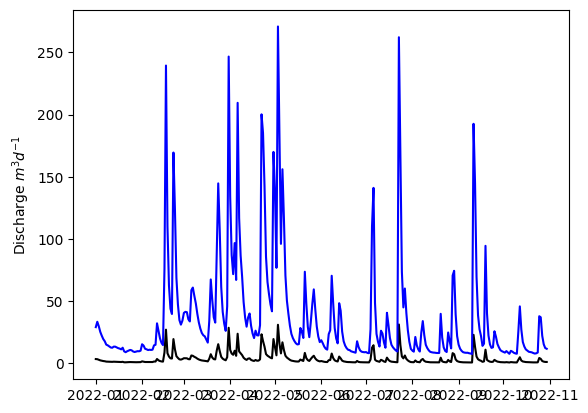

(10, 303)
Microplastic Landscape stored mass (black), and mobilized mass flux (blue)
2610.1465745913974


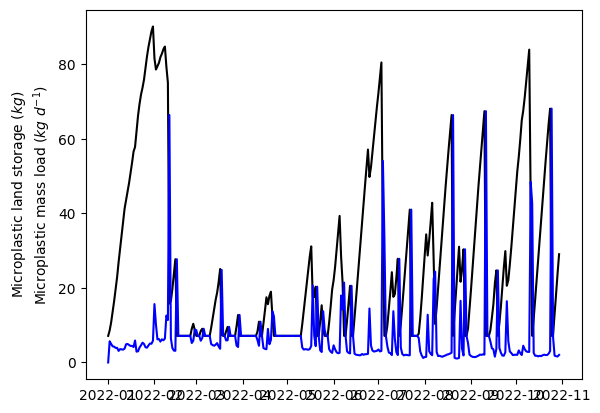

In [20]:
if True:
    plt.plot(dom.tidx,dom.Q[0,:],'k-')
    plt.plot(dom.tidx,dom.Q[-1,:],'b-')
    plt.gca().set_ylabel("Discharge $m^3 d^{-1}$")
    print("Discharge at the first (black), and last (blue) reach in the {} pixel toy stream".format(dom.reaches))
    plt.show()
    print(dom.mass_mobilized.shape)
    print("Microplastic Landscape stored mass (black), and mobilized mass flux (blue)")
    print(dom.LM)
    plt.plot(dom.tidx,dom.mass_accumulated[0,:],'k-')
    plt.plot(dom.tidx,dom.mass_mobilized[0,:],'b-')
    plt.gca().set_ylabel("Microplastic land storage ($kg$)\nMicroplastic mass load ($kg \ d^{-1}$)")
    plt.show()

### Set up the microplastic model

In [21]:
cCollection=CohortCollection(dom,1.4,max_diam=5,min_diam=0.1,n=5,k=2.1,massFrac=1.)
cCollection.initialize_cohorts()

Distribution of particle diameters in this cohort collection
[0.13140912 0.24473852 0.45580508 1.16594412 2.96341851]
settling:  3.7546566514704207e-06
diameter:  131.40911525052593 $\mu$   eff_ratio:  0.5736928088600853
settling:  1.3023385565208447e-05
diameter:  244.7385181470289 $\mu$   eff_ratio:  0.2720114617647357
settling:  4.517285795324497e-05
diameter:  455.8050798121013 $\mu$   eff_ratio:  0.1289718716858334
settling:  0.00029557977868906177
diameter:  1165.9441205968783 $\mu$   eff_ratio:  0.04178464449398017
settling:  0.0019094365176513968
diameter:  2963.4185086667303 $\mu$   eff_ratio:  0.013642011422273542


In [22]:
plt.rcParams['figure.dpi'] = 300

### Run the simulation

In [23]:
run = cCollection.advance_cohorts()
while run:
    run = cCollection.advance_cohorts()

#### Count concentration at upstream (black) and downstream (blue) reaches.

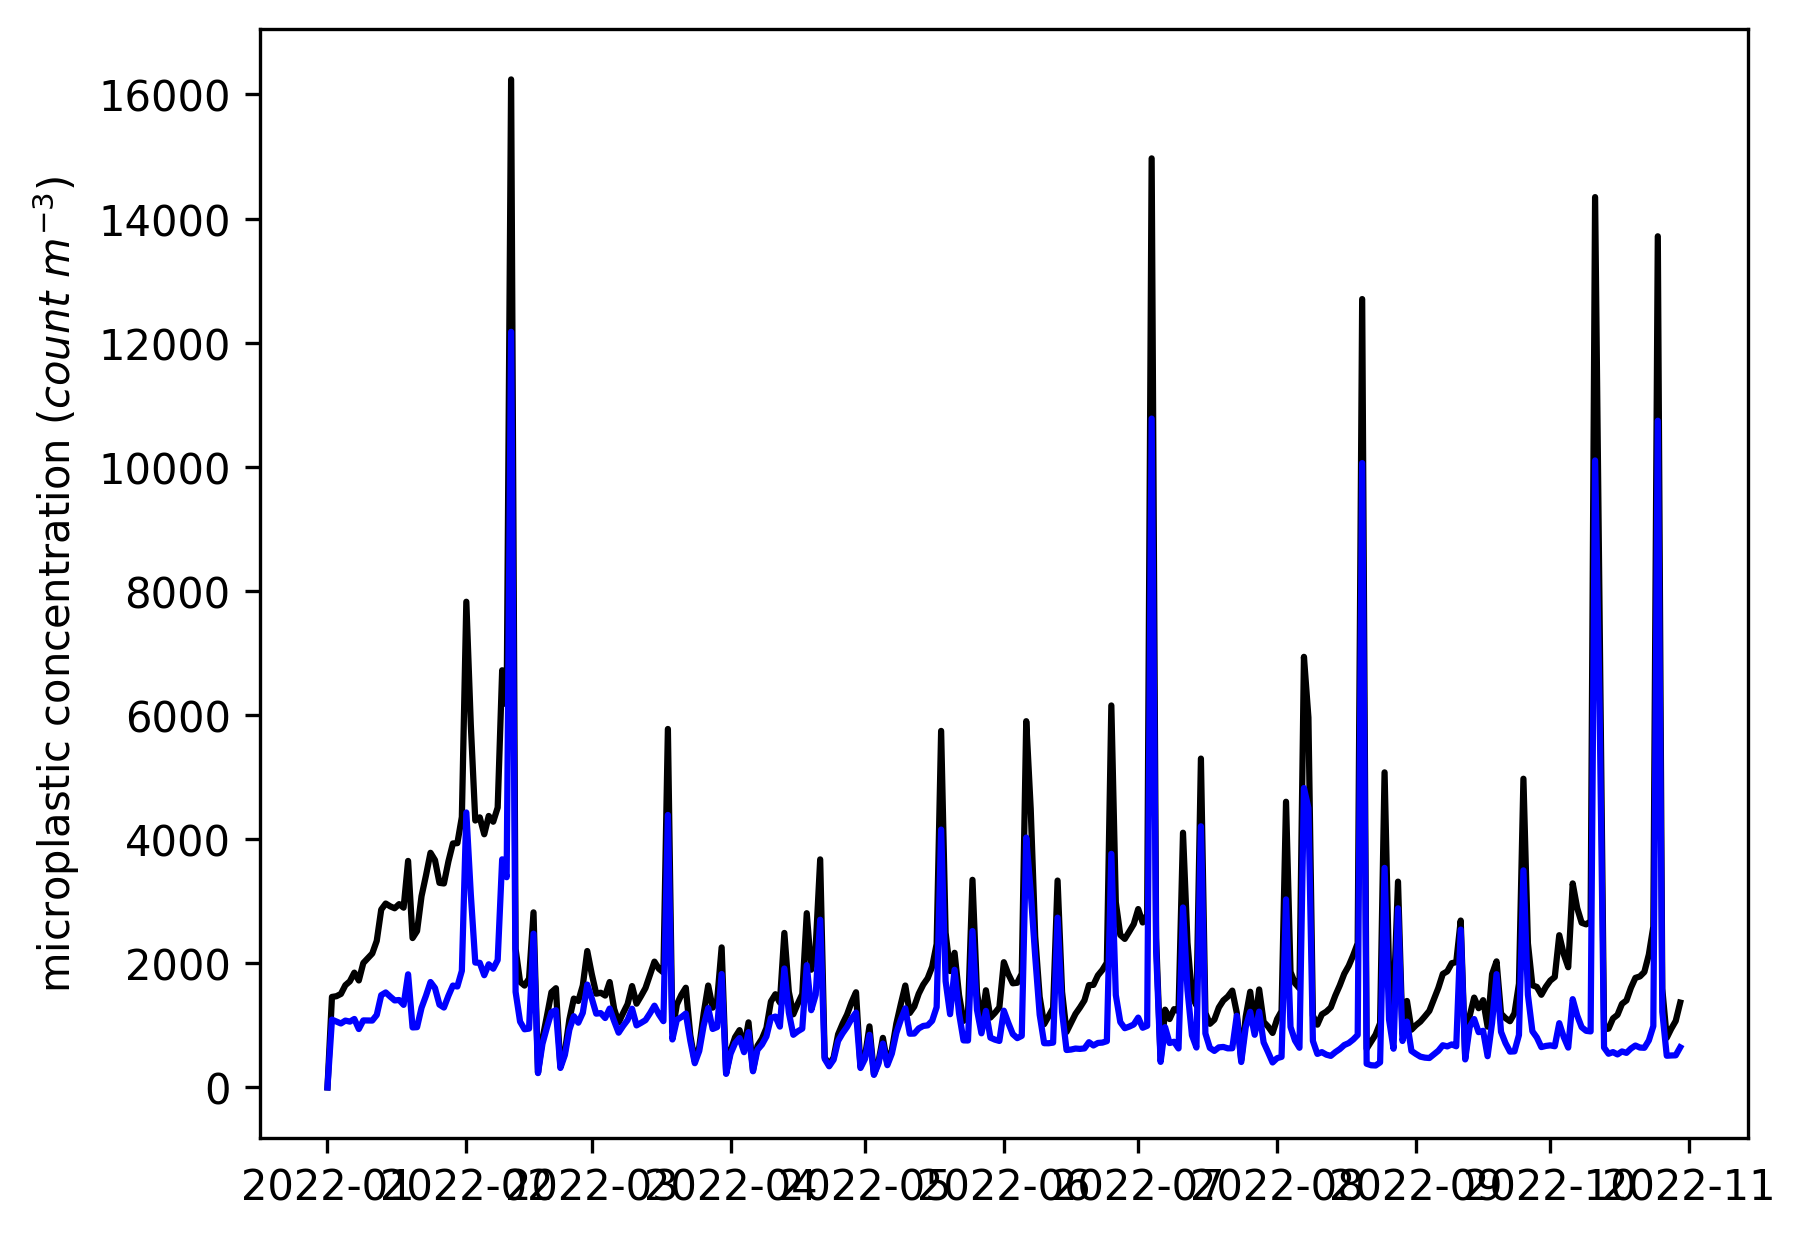

In [24]:
plt.plot(dom.tidx,cCollection.cohorts[0].n_wc[0,1:],'k-')
plt.plot(dom.tidx,cCollection.cohorts[0].n_wc[9,1:],'b-')
_=plt.gca().set_ylabel("microplastic concentration ($count \ m^{-3}$)")

#### Number flux at downstream of smallest (black) and next to smallest (blue) particle cohorts

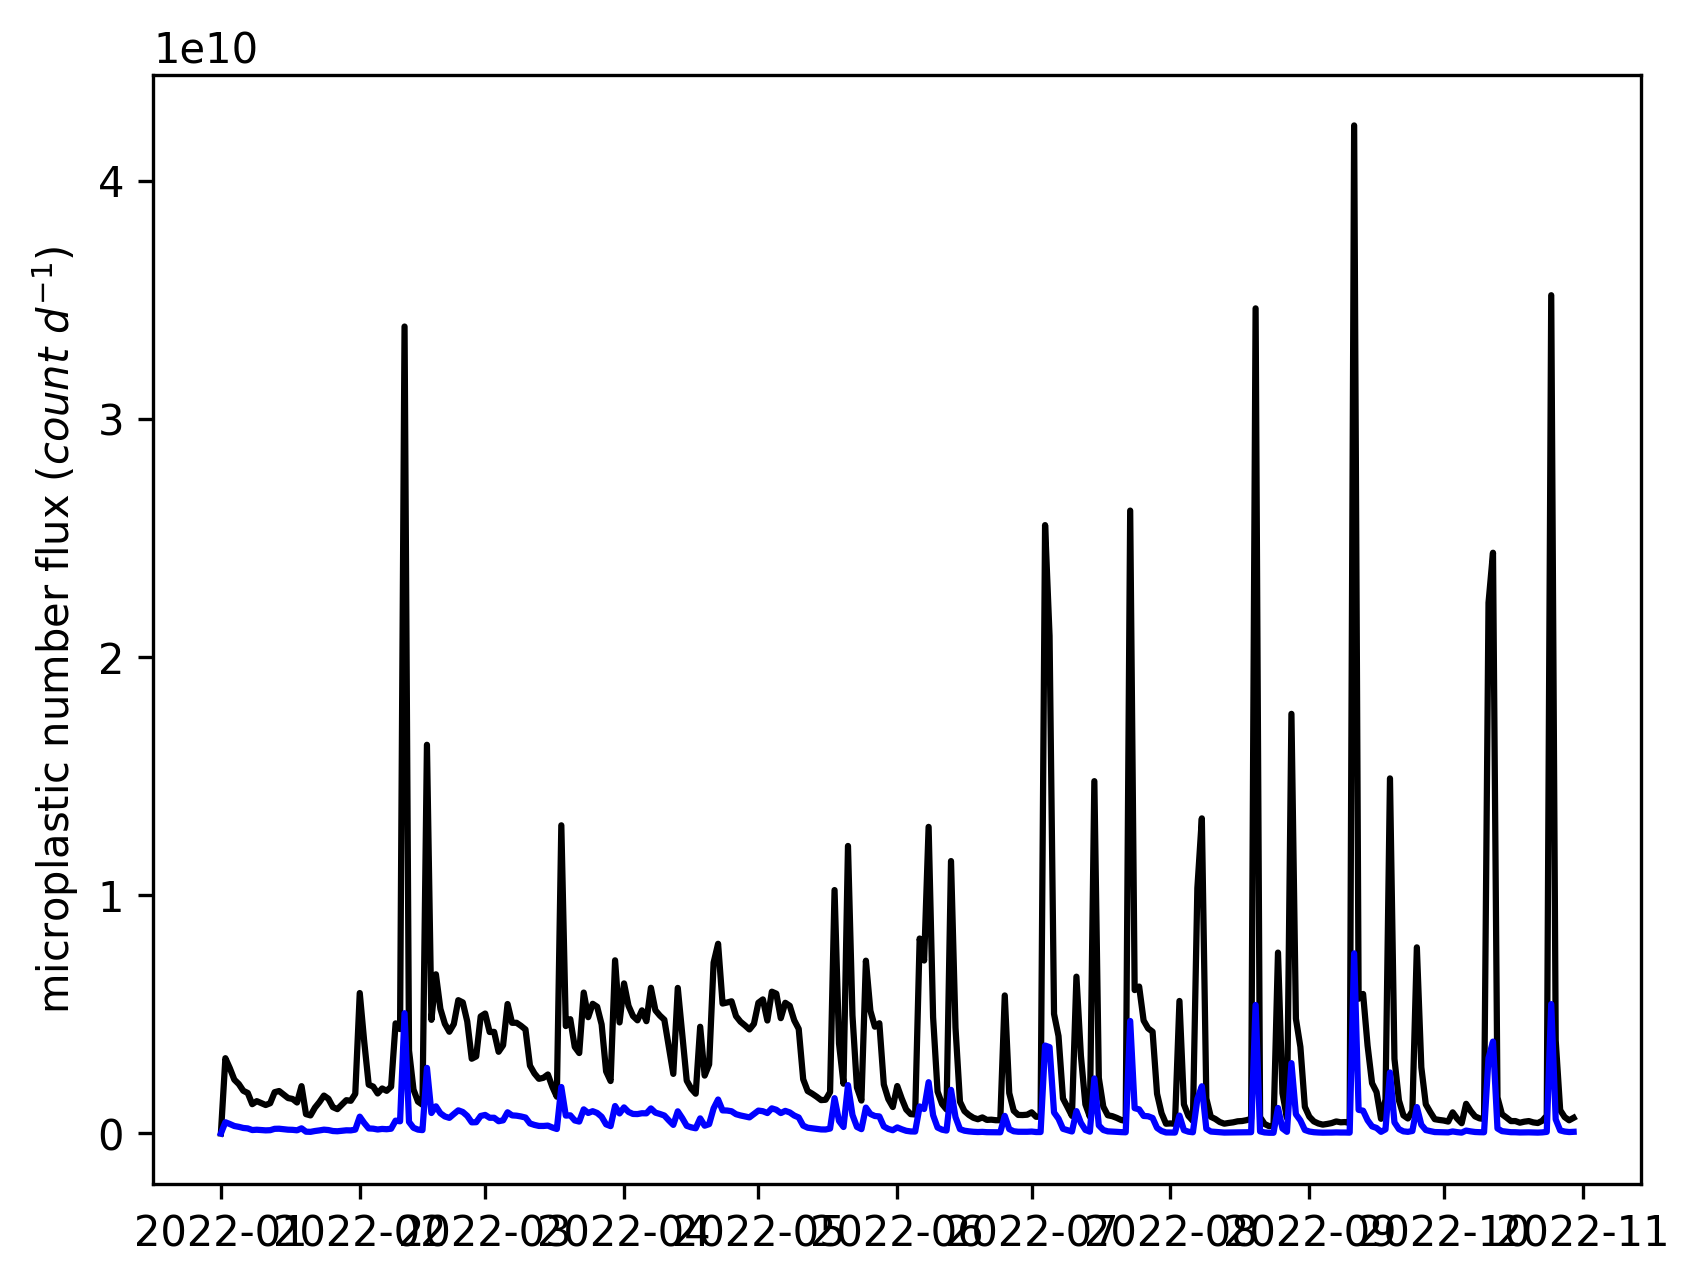

In [25]:
plt.plot(dom.tidx,dom.Q[9,:]*86400*cCollection.cohorts[0].n_wc[9,1:],'k-')
plt.plot(dom.tidx,dom.Q[9,:]*86400*cCollection.cohorts[1].n_wc[9,1:],'b-')  
_=plt.gca().set_ylabel("microplastic number flux ($count \ d^{-1}$)")

#### Number flux at downstream of next to largest (black) and largest (blue) particle cohorts.

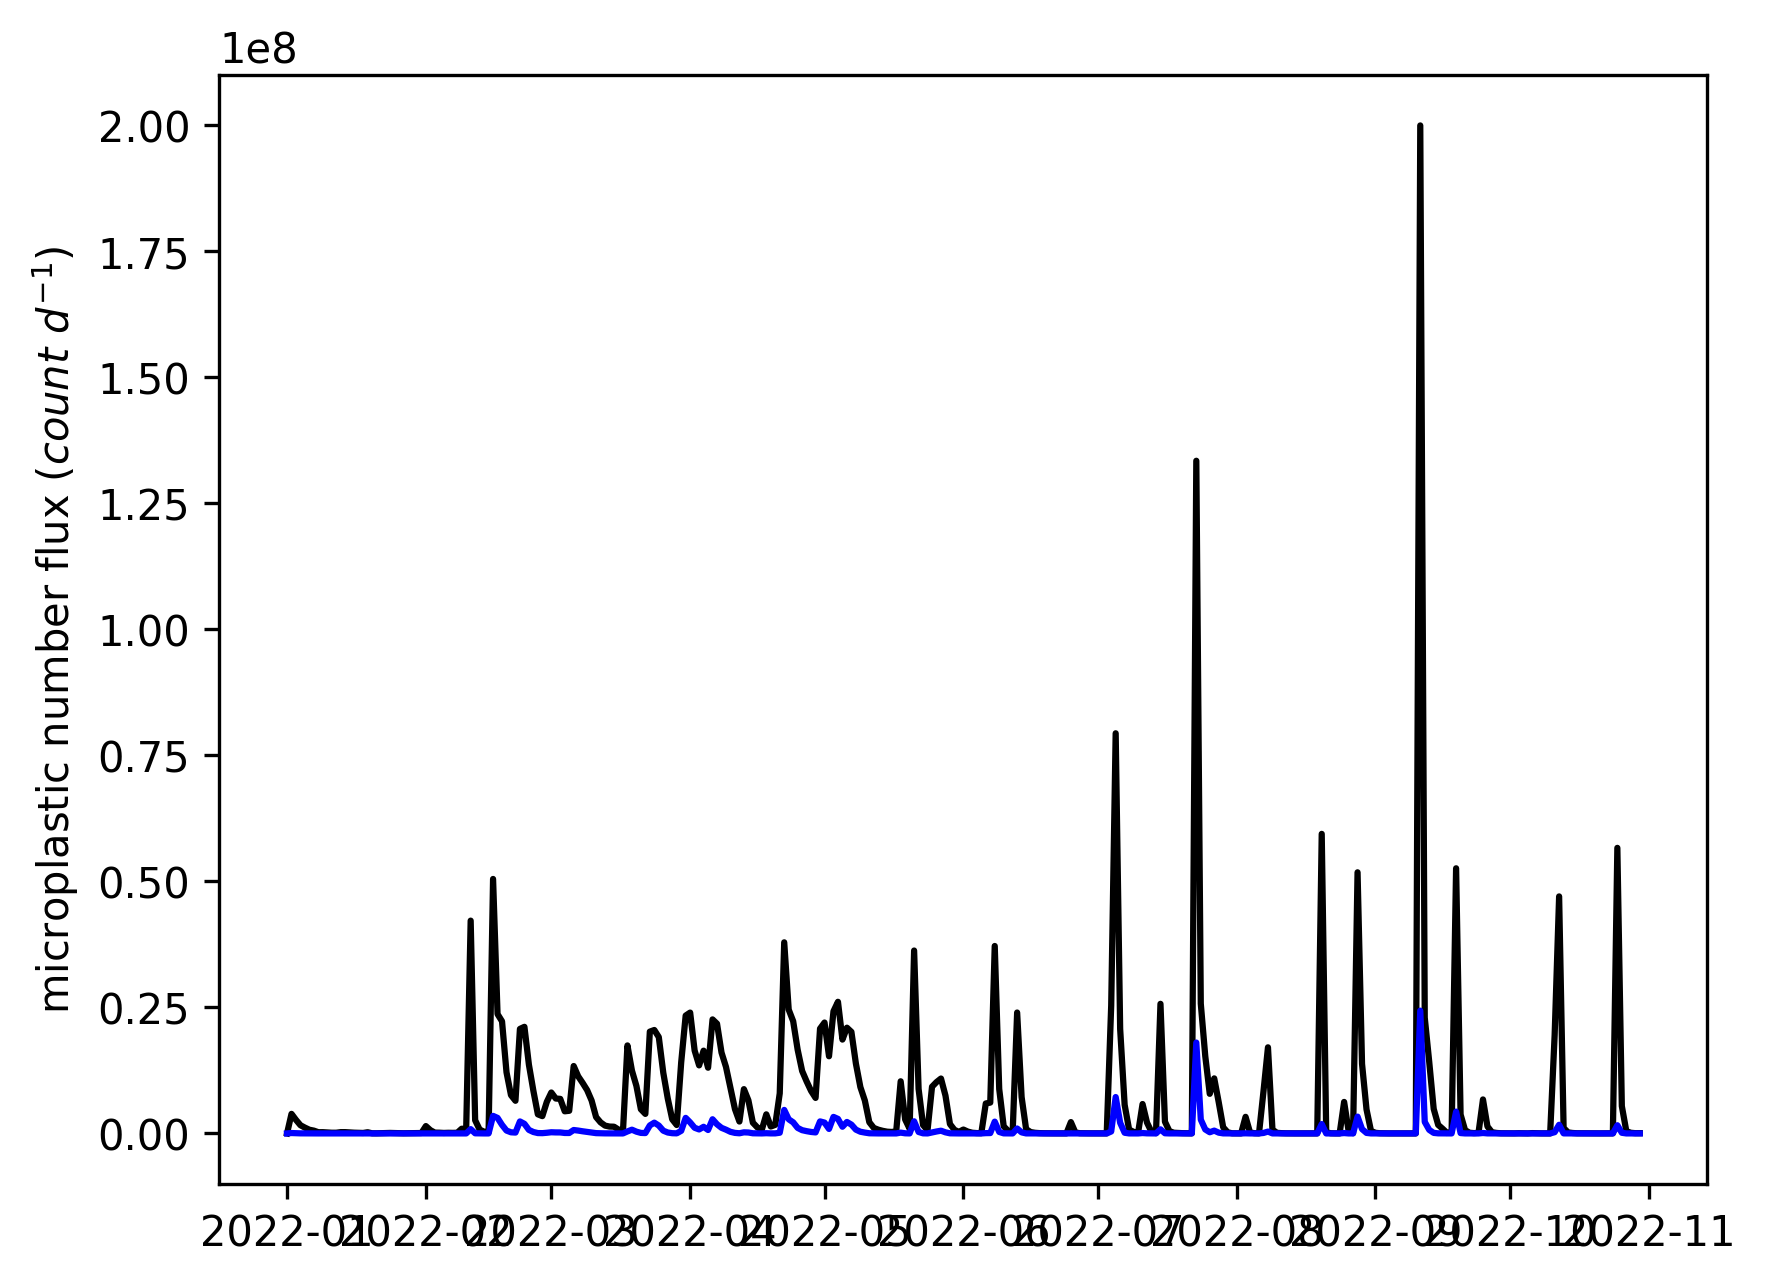

In [26]:
plt.plot(dom.tidx,dom.Q[9,:]*86400*cCollection.cohorts[3].n_wc[9,1:],'k-')
plt.plot(dom.tidx,dom.Q[9,:]*86400*cCollection.cohorts[4].n_wc[9,1:],'b-')
_=plt.gca().set_ylabel("microplastic number flux ($count \ d^{-1}$)")

#### Mass flux at downstream of next to largest (black) and largest (blue) particle cohorts

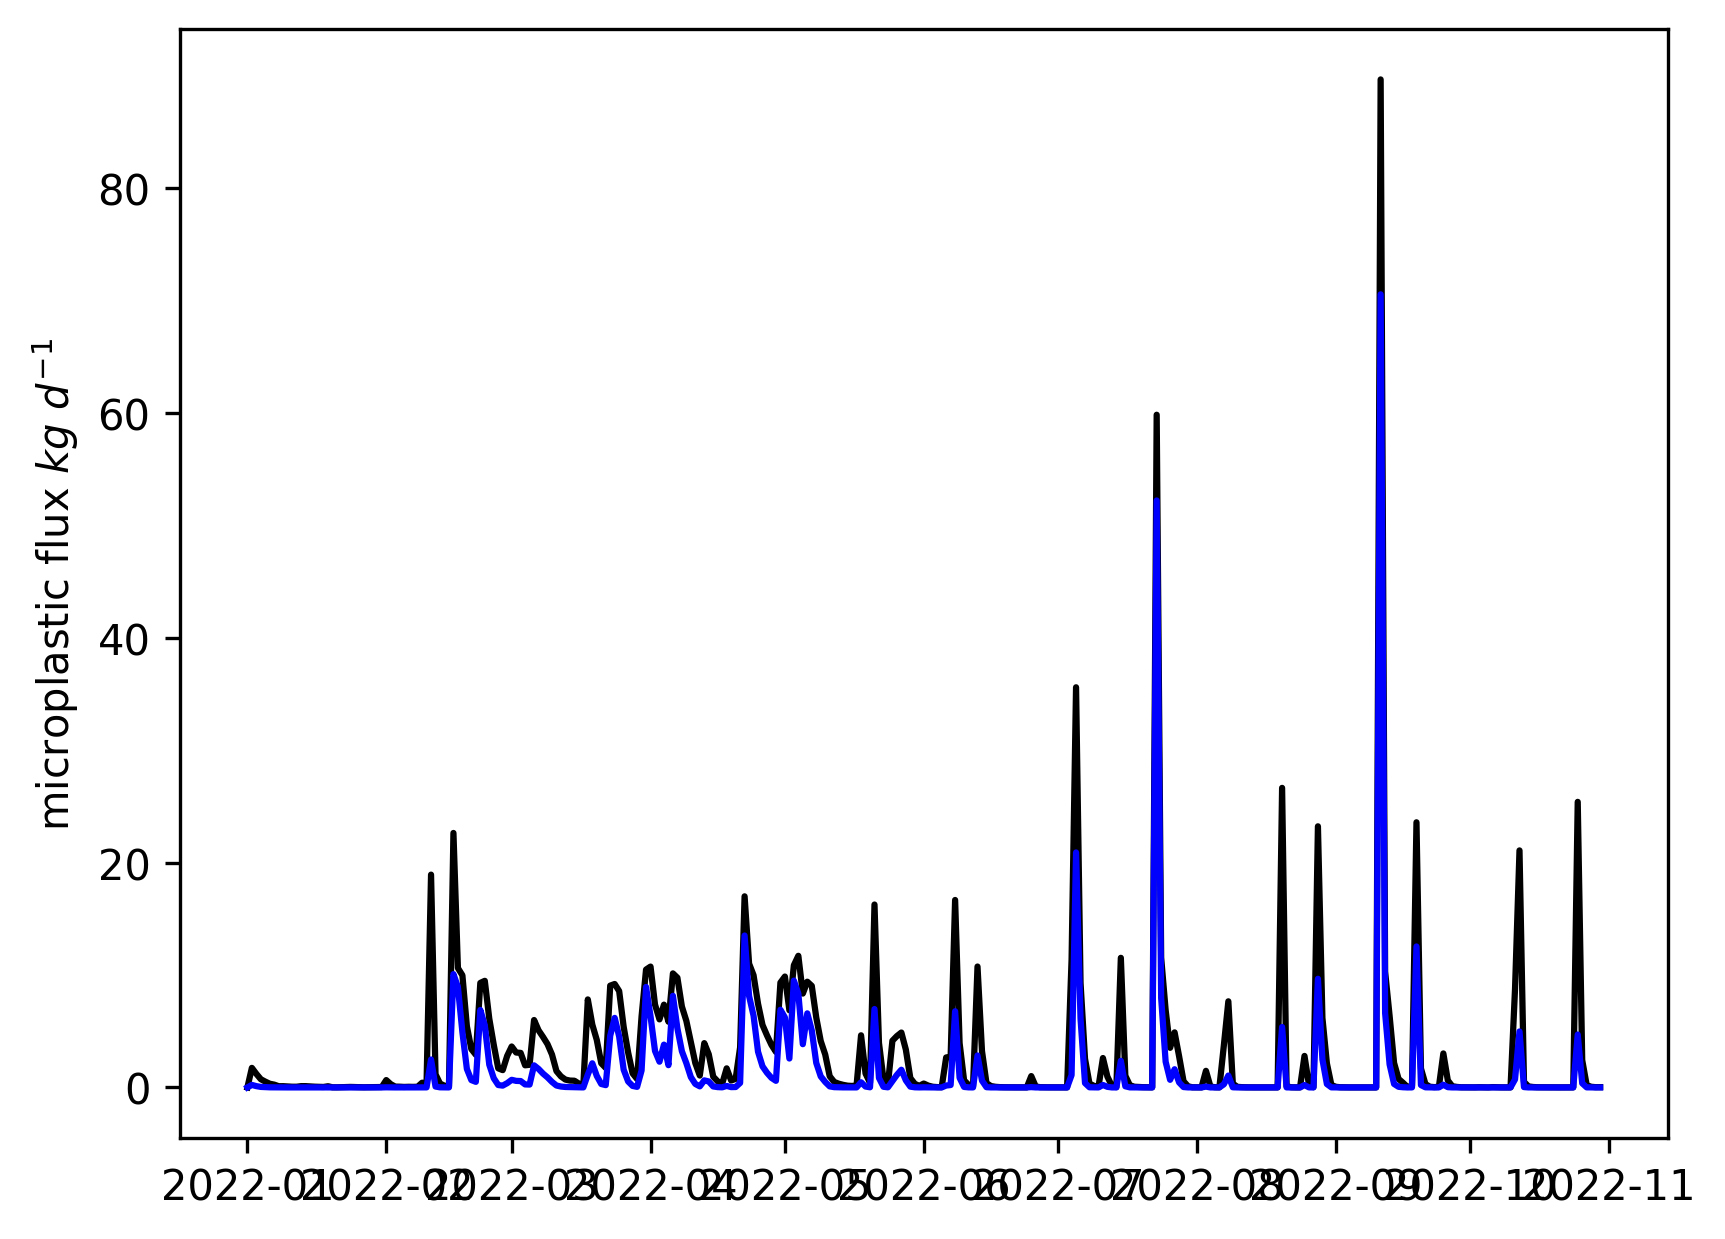

In [27]:
plt.plot(dom.tidx,dom.Q[9,:]*86400*cCollection.cohorts[3].n_wc[9,1:]*cCollection.ms[3],'k-')
plt.plot(dom.tidx,dom.Q[9,:]*86400*cCollection.cohorts[4].n_wc[9,1:]*cCollection.ms[4],'b-')
_=plt.gca().set_ylabel("microplastic flux $kg \ d^{-1}$")

The hypotheses posed by our PSIREN Proposal explore three consequences of storm mediated transport of microplastics.

_H1_ : Storms increase riverine concentrations of micro- and macroplastic via mobilization from the landscape, resuspension of plastic stored in the channel, and reduced deposition.

_H2_ : The proportion of plastic retained in the river network relative to plastic exported downstream will vary by particle shape, density, size, and flow conditions.

_H3_ : The proportion of plastic retained within a river network decreases with increasing flashiness of the watershed’s flow regime.

The toy model introduced above can be used to explore predictions associated with each hypothesis.  

_H1_ implies a positive hysteresis as particles located upstream are mobilized and then become exhausted.  Does the model predict hysteretic loops, and do they exhibit higher concentrations on the rising limbs?

    1) Revise code as needed so that storm response from the landscape can be turned off / on independently.

    2) Run a suite of simulations focusing on a target reach that varies landscape input rates, resuspension parameters, and deposition rates (3D sensitivity analsysis).

    3) For a subset of storm events of varying size, separate storm from pre-/post-storm flows and plot concentration against discharge.

    4) Calculate hysterisis properties such as loop size and direction.  

    5) Plot hysterisis properites across the gradients of parameters tested.

Do hysteretic loops emerge from this simple model?  Under what conditions?

_H2_ During storms larger particles will have a larger increase in downstream flux than smaller particles because transport limitation affects them disproportionately, whereas smaller particles remain supply limited.

_H2_ Size sorting along the continuum from small to large rivers (Vannote et al. 1980, Schmitt et al. 2016) will decline during high flows as transport of larger, denser particles increases disproportionately and will be expressed as a different particle size distribution at stations located along the river continuum.
   -  A corrolary is that particles stored on the benthic surface will be well-sorted upstream during baseflow, and more poorly sorted downstream --- as flow velocities decline downstream and smaller particles fall out of suspension.
   
_H3_ Flashiness governs the amount of plastic retained.  So urban streams will retain less microplastic as impervious surfaces increase storm response.

__Operations__

Define network and build cell table.

Open population data and define microplastic loading. (According to the above.)

Define cohorts of particle properties. (According to the above.)

Open Flow and Hydraulics data files.

Initialize cohort pools.

Begin time-series loop.

Update the dynamic landsurface mass pool.

Calculate daily nonpoint loading to each reach.

Read hydraulics data for time-step.

Distribute time-series data, and loading across cohort processes.

Begin traversal of cell-table.

Calculate resuspension flux.

Calculate new concentration in water column.

Calculate new storage along channel bed.


Revisit all of the above while considering that channels do not have rectangular banks, and flow conditions dictate the width over which these transport processes are active.

In [28]:
mcode ="""
graph TB;
subgraph WBMobject;
direction LR;
A(Read init file);
B[(Create WBM output file handles)];
C[(Create Landcover file handles)];
D[Define Domain extent];
E[Define Network];
end
A --> B & C;

subgraph DomainObject;
direction LR;
BA(Store cell table);
BB(Manage reads of spatial files);
BC(Initializes cohort collections);
BD(Creates and updates Land Surface Store LSS);
BE[(Write cohort data to disk)];
end
BB --> BD;
D -.-> BB;
E -.-> BA;

subgraph CohortCollection;
direction LR;
CA(Acquires input flux from LSS);
CB(Disaggregates input according to cohorts);
CA -.-> CB;
CC(Acquires timestep flow and hydraulics);
CD(Advances cohorts);
CE[(Pass cohort data to DomainObject)];
CB & CC -.-> CD;
end
BD -.-> CA;
BA -.-> CD;
subgraph Cohorts;
direction TB;
DA[(Initialized with vectorized cell table)];
DB(Acquire timestep flow and hydraulics );
DC["Array Pre-solves: Settling Resuspension"];
DD[Network traversal];
DE[Array Post-solves: Bed store];
DF[(Return cohort states and fluxes)];
DB --> DC;
DC --> DD;
DD --> DE;
DE --> DF;
end

D  -.->DomainObject;

BC & BD -.-> CohortCollection;

CD -.-> DB;
DF -.-> CE;
CE -.-> BE;
"""

### Diagram of software structure (Full WBM Integration)

In [29]:
js_ui({'src':mcode},TEMPLATE_MERMAIDJS,height=500,dpi = 300)